In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
filepath = 'SEPT 2022 BELGAUM.csv'
data = pd.read_csv(filepath)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Surface_Pressure,Wind_speed
0,2022,1,24.47,21.82,28.07,18.01,19.53,93.40,1.31
1,2022,2,24.66,22.29,28.30,18.43,4.44,93.45,1.90
2,2022,3,24.58,20.81,29.28,18.07,0.38,93.49,1.46
3,2022,4,24.21,21.59,27.85,18.19,0.15,93.49,1.76
4,2022,5,23.71,21.77,26.87,18.07,23.72,93.52,1.71


In [ ]:
data.shape


(30, 9)

In [ ]:
data.drop(['Surface_Pressure'], axis = 1, inplace = True)
data.head()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
0,2022,1,24.47,21.82,28.07,18.01,19.53,1.31
1,2022,2,24.66,22.29,28.30,18.43,4.44,1.90
2,2022,3,24.58,20.81,29.28,18.07,0.38,1.46
3,2022,4,24.21,21.59,27.85,18.19,0.15,1.76
4,2022,5,23.71,21.77,26.87,18.07,23.72,1.71


In [ ]:
# missing columns 
data.isna().sum()

YEAR               0
Date               0
Temperature        0
Min_Temperature    0
Max_Temperature    0
Humidity           0
Precipitation      0
Wind_speed         0
dtype: int64

In [ ]:
data.describe()

,YEAR,Date,Temperature,Min_Temperature,Max_Temperature,Humidity,Precipitation,Wind_speed
count,30.0,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2022.0,15.500000,22.895333,20.507333,26.365333,17.031333,8.506333,2.608000
std,0.0,8.803408,0.929266,1.226422,1.176215,0.991932,10.155166,1.011661
min,2022.0,1.000000,21.440000,18.120000,23.950000,15.140000,0.000000,1.310000
25%,2022.0,8.250000,22.107500,19.385000,25.710000,16.067500,0.412500,1.910000
50%,2022.0,15.500000,22.905000,20.955000,26.235000,17.300000,3.355000,2.265000
75%,2022.0,22.750000,23.452500,21.532500,26.990000,17.895000,18.465000,3.182500
max,2022.0,30.000000,24.660000,22.290000,29.280000,18.430000,30.530000,4.660000


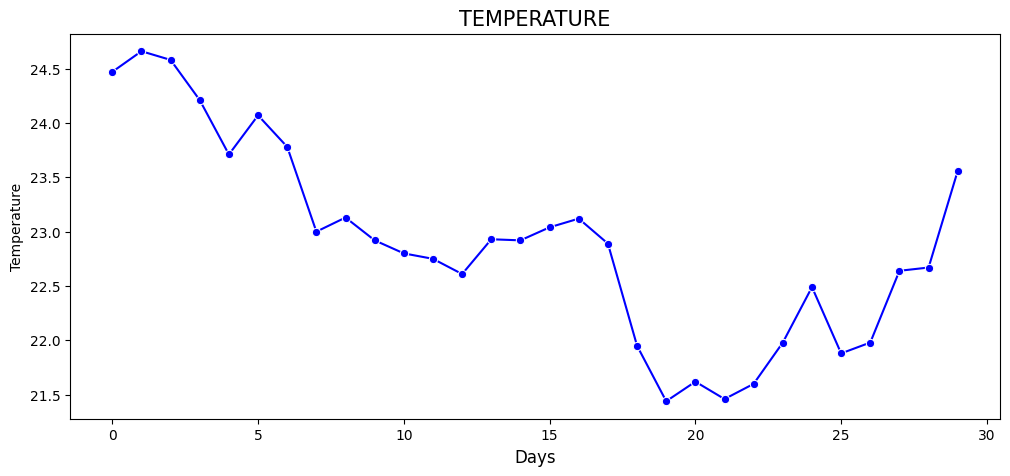

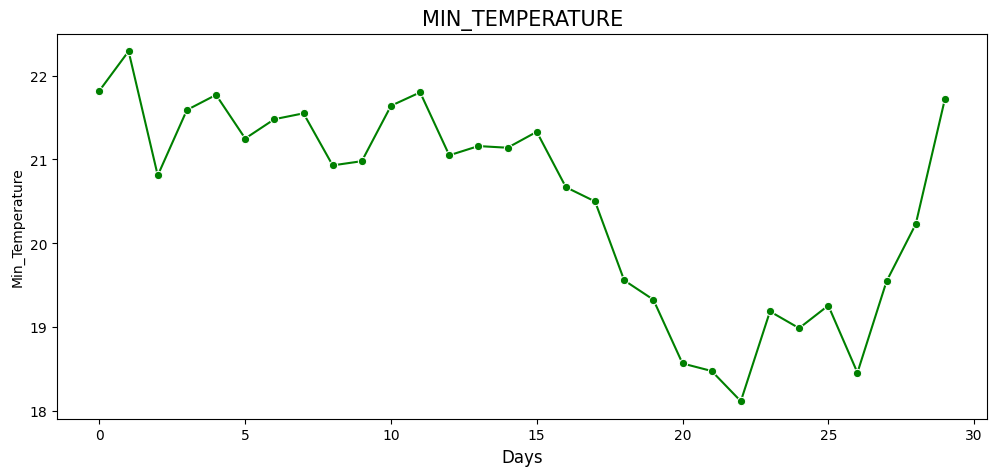

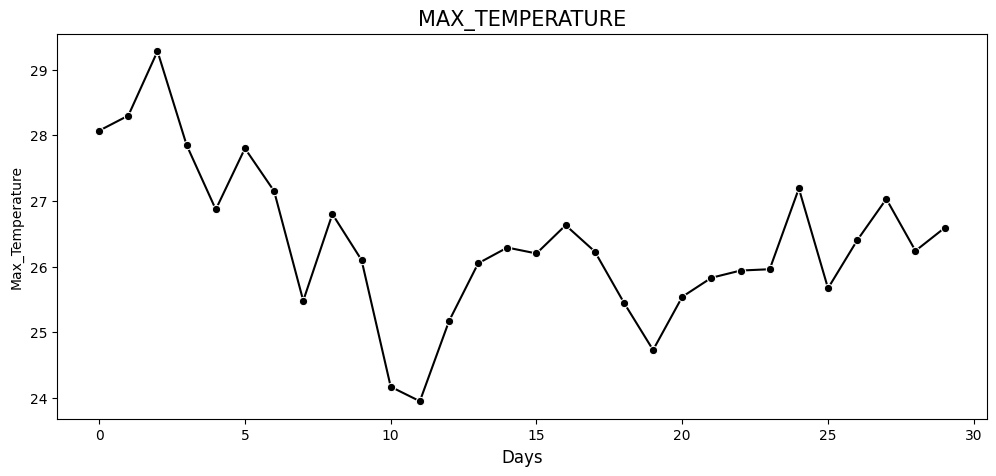

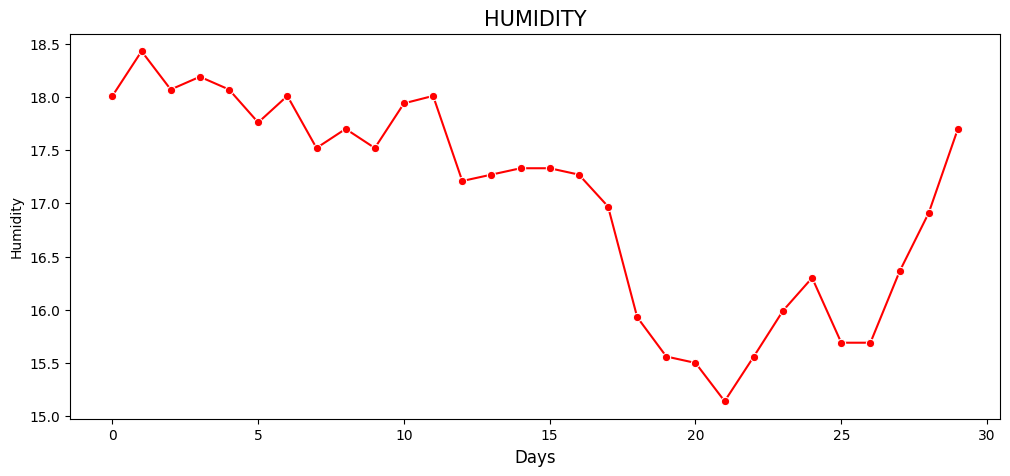

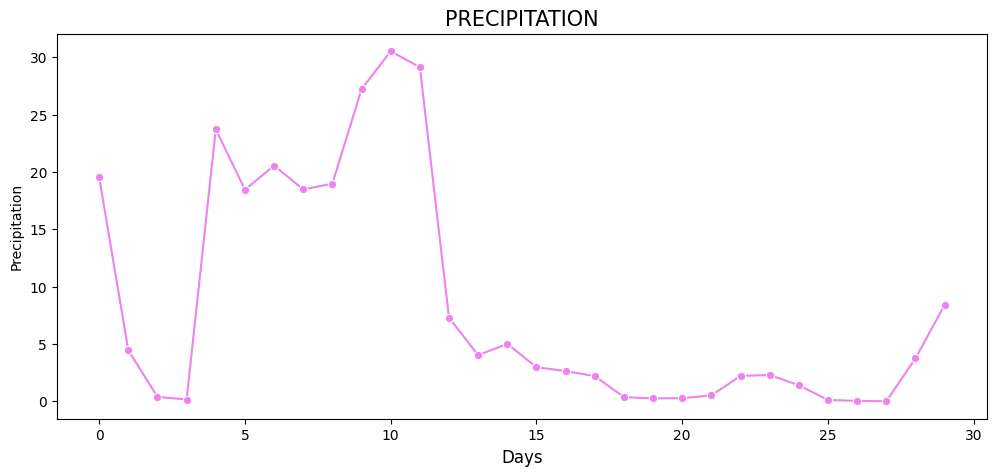

In [ ]:
# Plotting Weather Data
color={2:'blue',3:'green',4:'black',5:'red',6:'violet',7:'orange'}
for index in range(2,7):
    plt.figure(figsize=(12,5))
    plt.xlabel('Days', fontsize=12)
    plt.title('{}'.format(data.columns[index].upper()), fontsize=15)
    sns.lineplot(data=data.iloc[:,index], 
                 color=color[index], marker='o')
    plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)


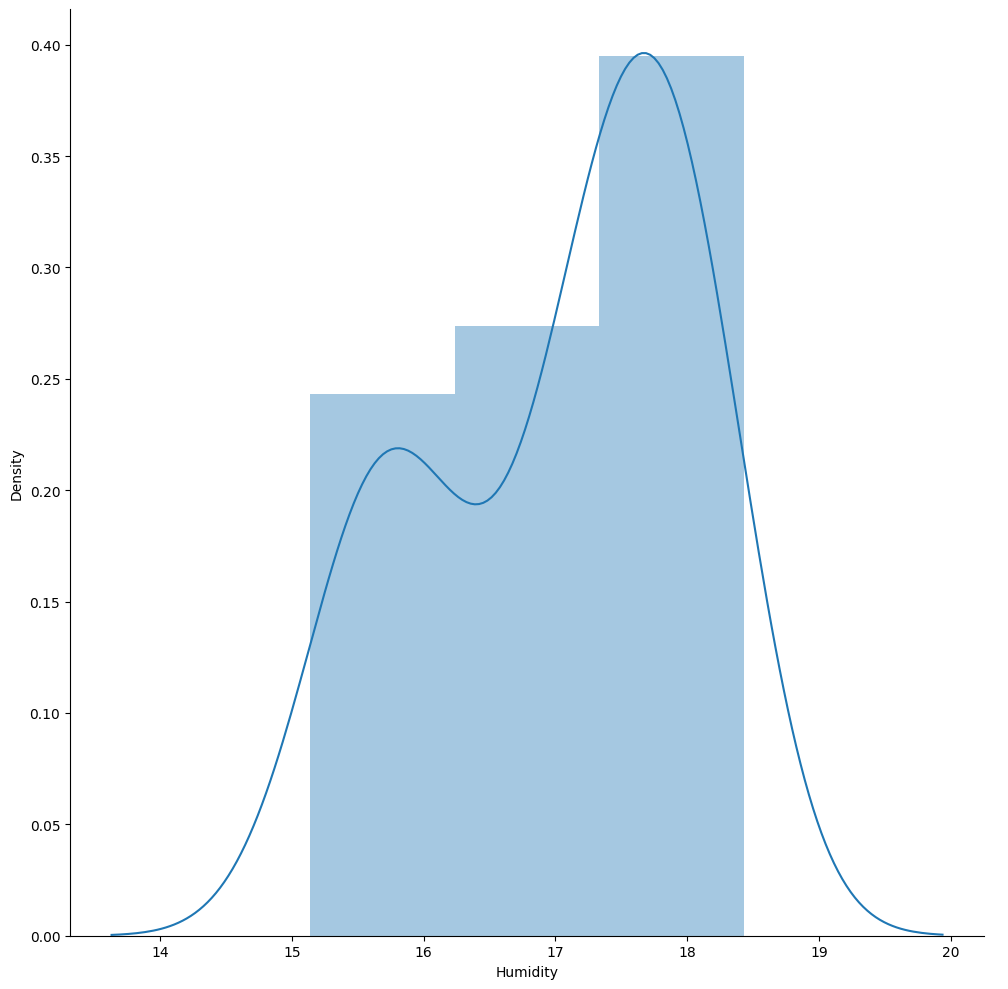

In [ ]:
# For Humidity
sns.FacetGrid(data, height=10).map(sns.distplot, "Humidity").add_legend()
plt.show()

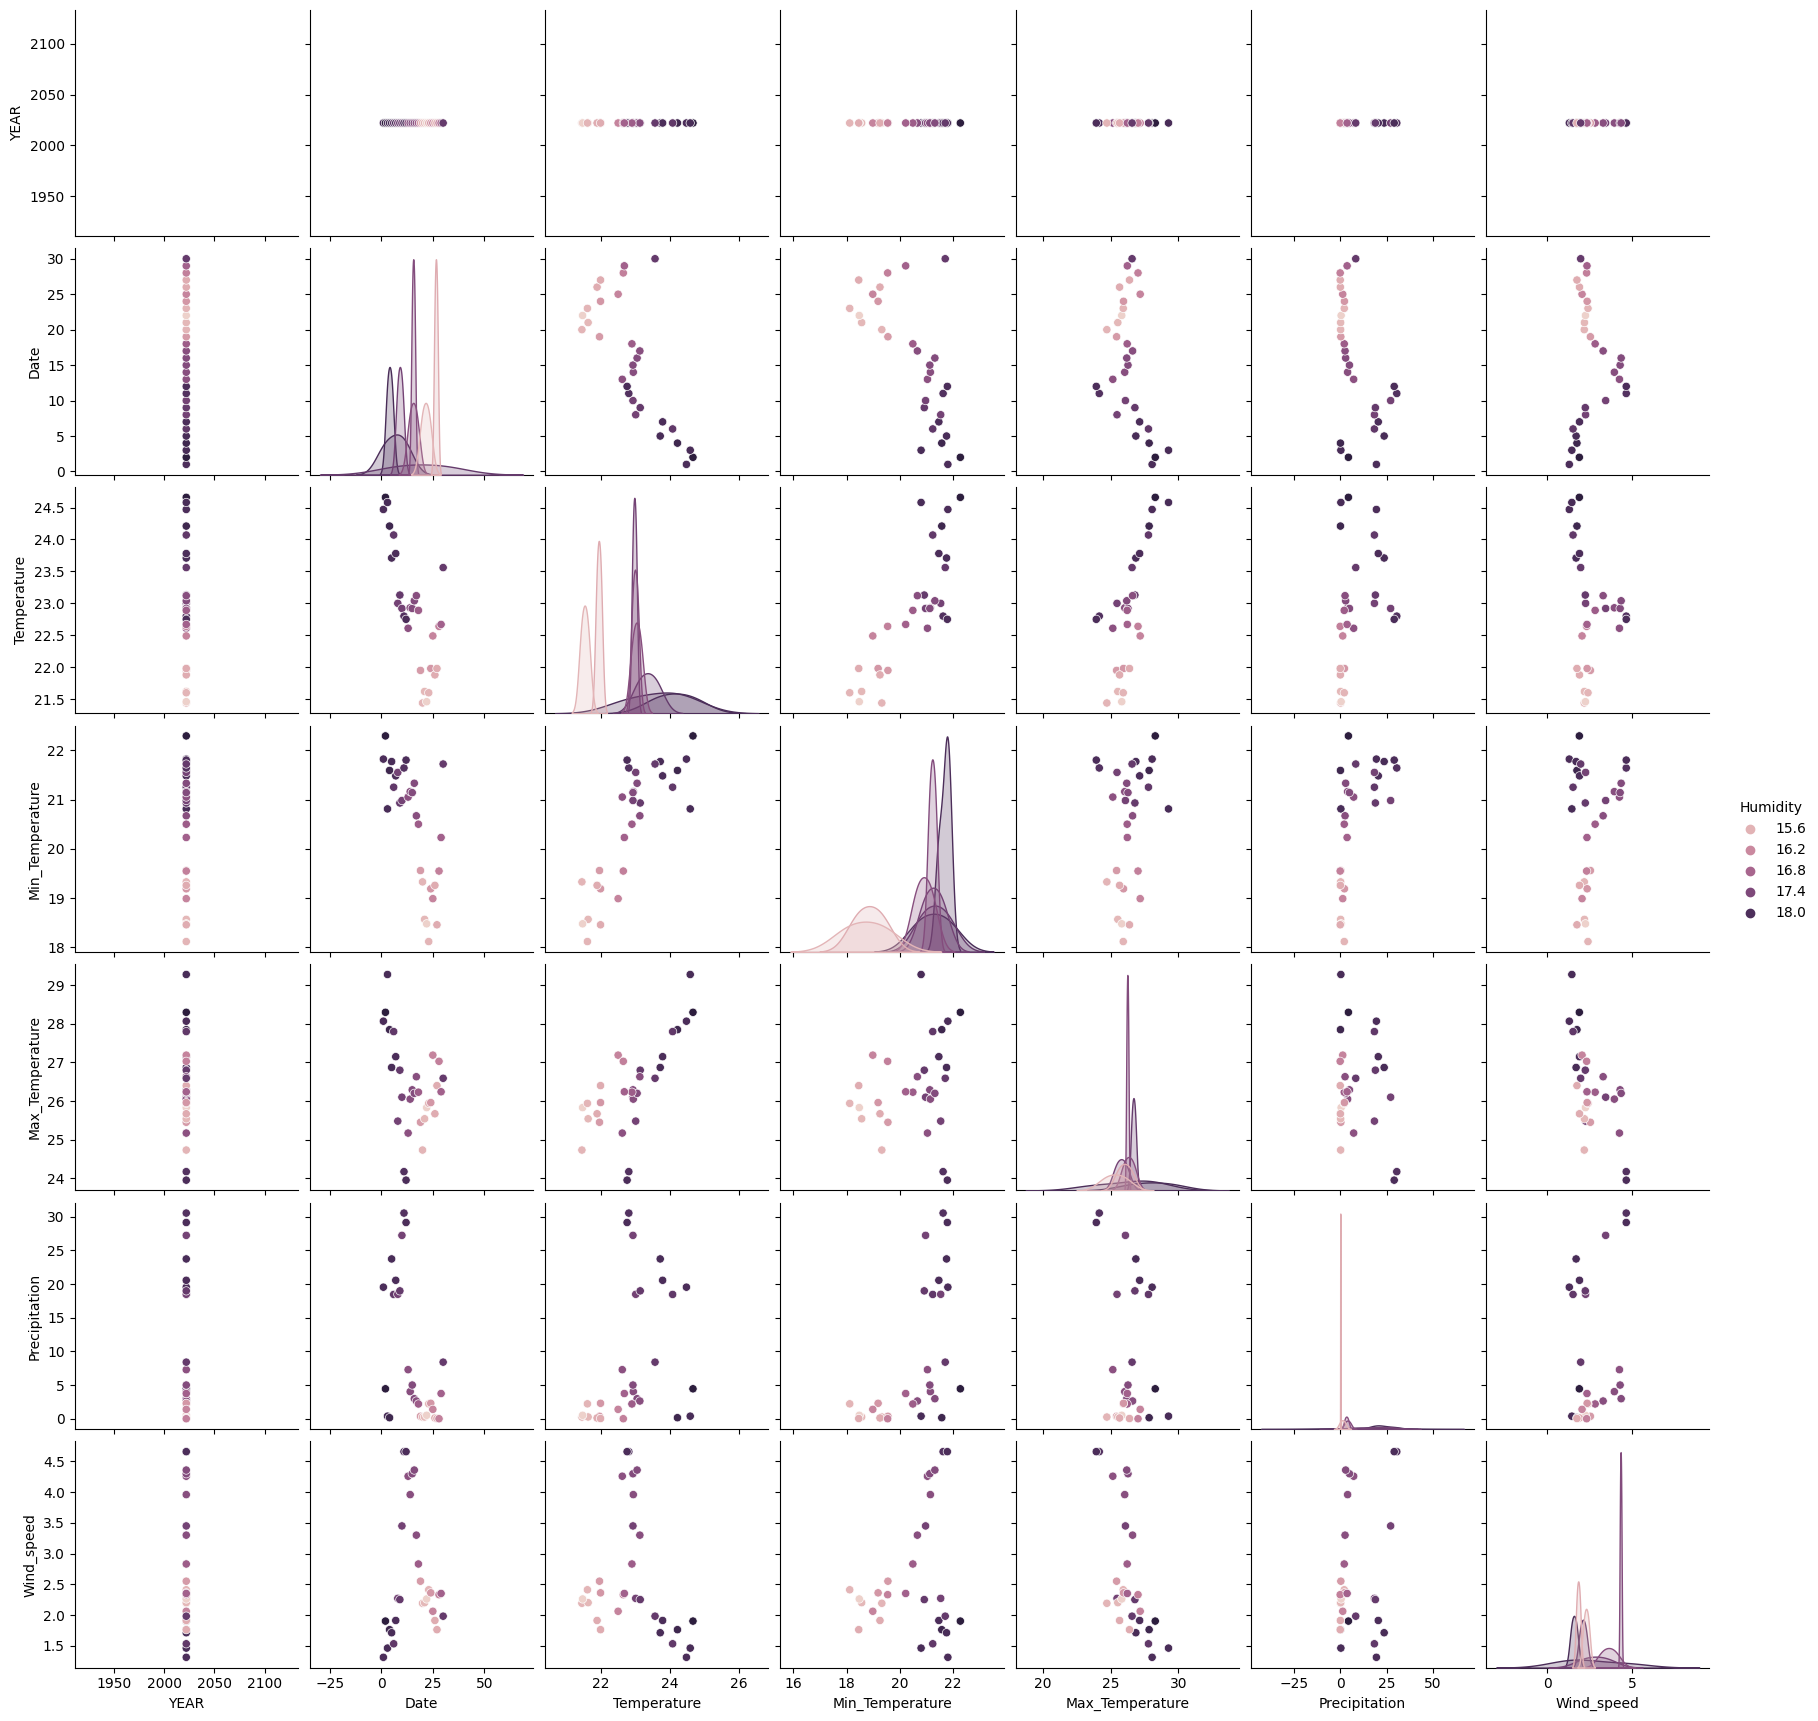

In [ ]:
sns.pairplot(data,hue="Humidity")

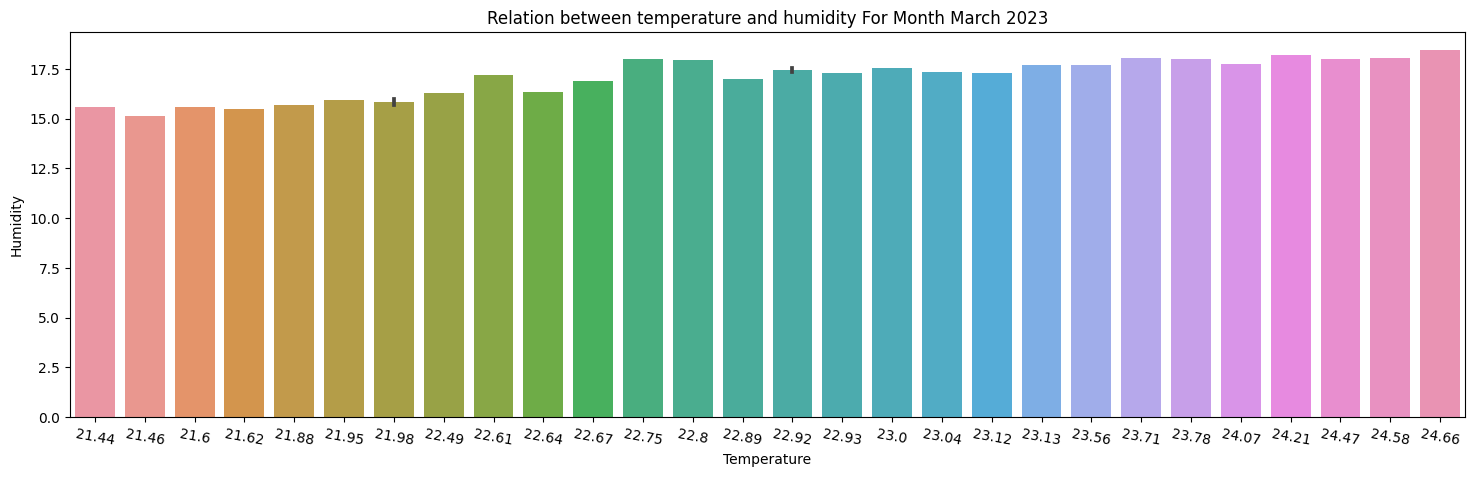

In [ ]:
plt.figure(figsize = (18,5))
sns.barplot(x='Temperature', y='Humidity',data=data)
plt.xticks(rotation=-10)
plt.title('Relation between temperature and humidity For Month March 2023')
plt.show()

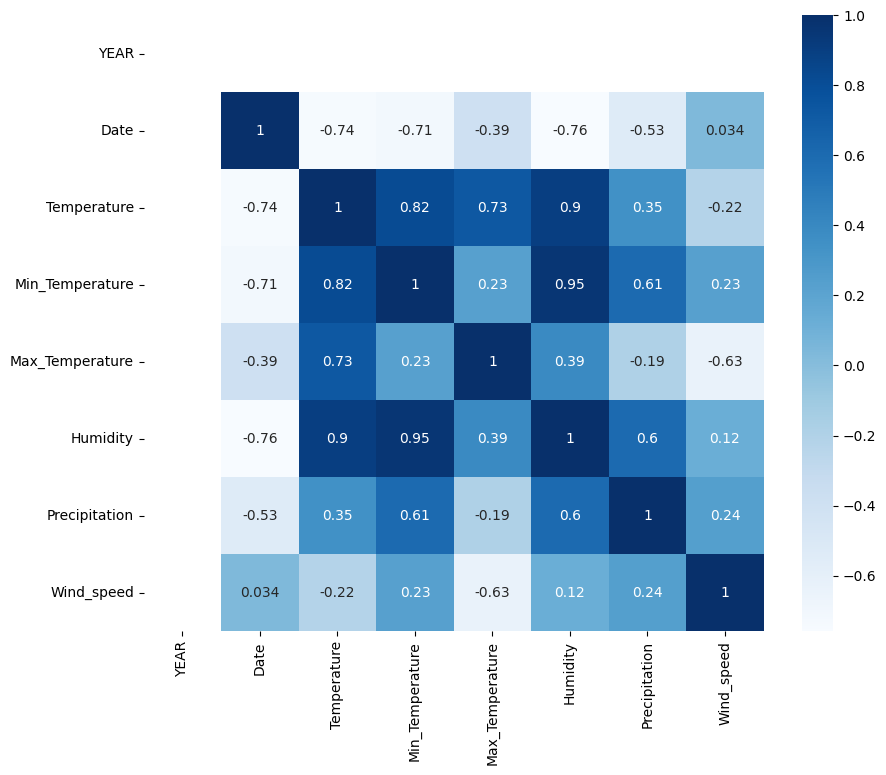

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data = data.corr(), annot = True, cmap = 'Blues')
plt.show()

**Humidity** (Create a pivot table to aggregate humidity by date & Heatmap Using Seaborn)

<Axes: ylabel='Date'>

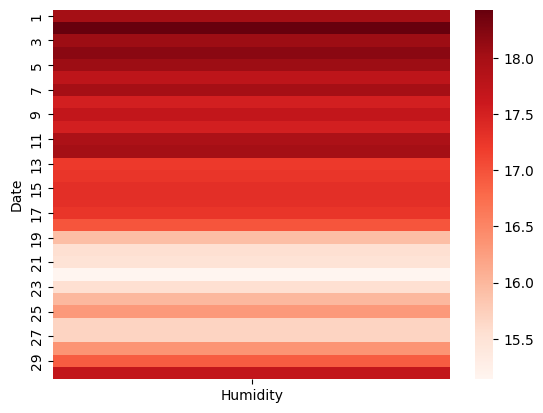

In [ ]:
humidity_table = pd.pivot_table(data, values='Humidity', index=['Date'])
sns.heatmap(data = humidity_table, cmap='Reds')

Temperature

<Axes: ylabel='Date'>

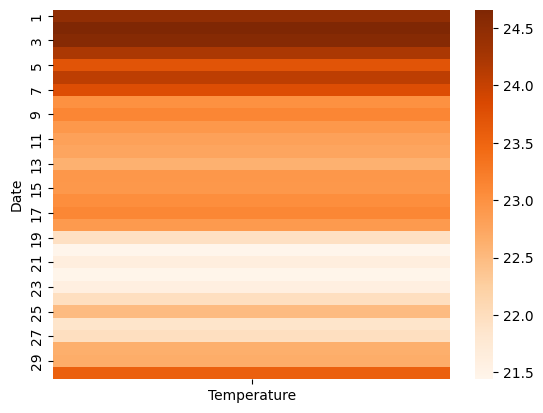

In [ ]:

Temperature_table = pd.pivot_table(data, values='Temperature', index=['Date'])
sns.heatmap(data = Temperature_table, cmap='Oranges')

In [ ]:
indices = ['Temperature', 'Humidity', 'Precipitation','Wind_speed']
ex_data = data.loc[:,indices]
ex_data

,Temperature,Humidity,Precipitation,Wind_speed
0,24.47,18.01,19.53,1.31
1,24.66,18.43,4.44,1.90
2,24.58,18.07,0.38,1.46
3,24.21,18.19,0.15,1.76
4,23.71,18.07,23.72,1.71
5,24.07,17.76,18.45,1.53
6,23.78,18.01,20.55,1.91
7,23.00,17.52,18.47,2.27
8,23.13,17.70,18.98,2.25
9,22.92,17.52,27.22,3.45


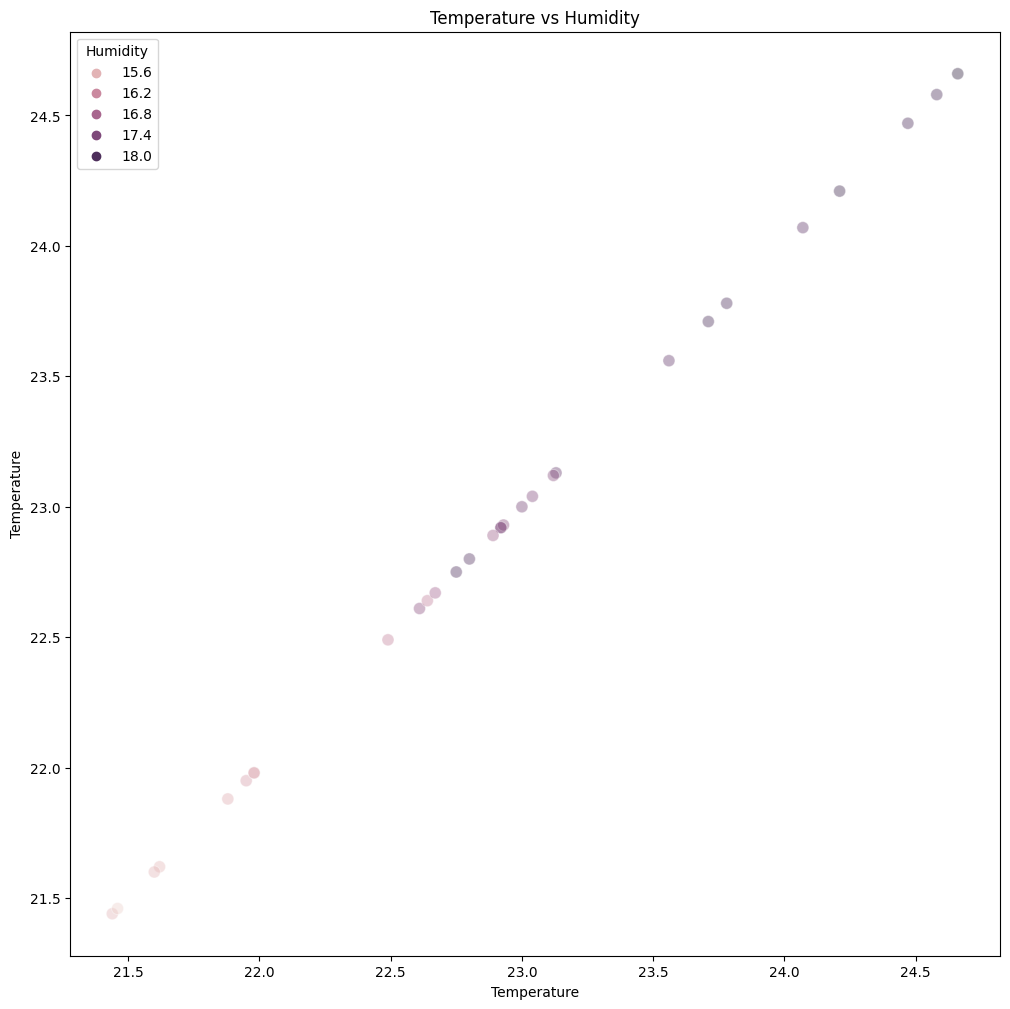

In [ ]:
#scatter plot for temperature and humidity by summary
plt.figure(figsize = (12,12))
plt.title('Temperature vs Humidity')
sns.scatterplot(x=ex_data.iloc[:,0], y=ex_data.iloc[:,0], hue= ex_data.iloc[:,1], s=75, alpha = 0.4)
plt.show()

DAYS-WISE ANALYSIS

In [ ]:
#Resampling the data days-wise by mean

indices = [2,3,4,5,6,7]
days = data.iloc[:,1] 

days.head()

0    1
1    2
2    3
3    4
4    5
Name: Date, dtype: int64

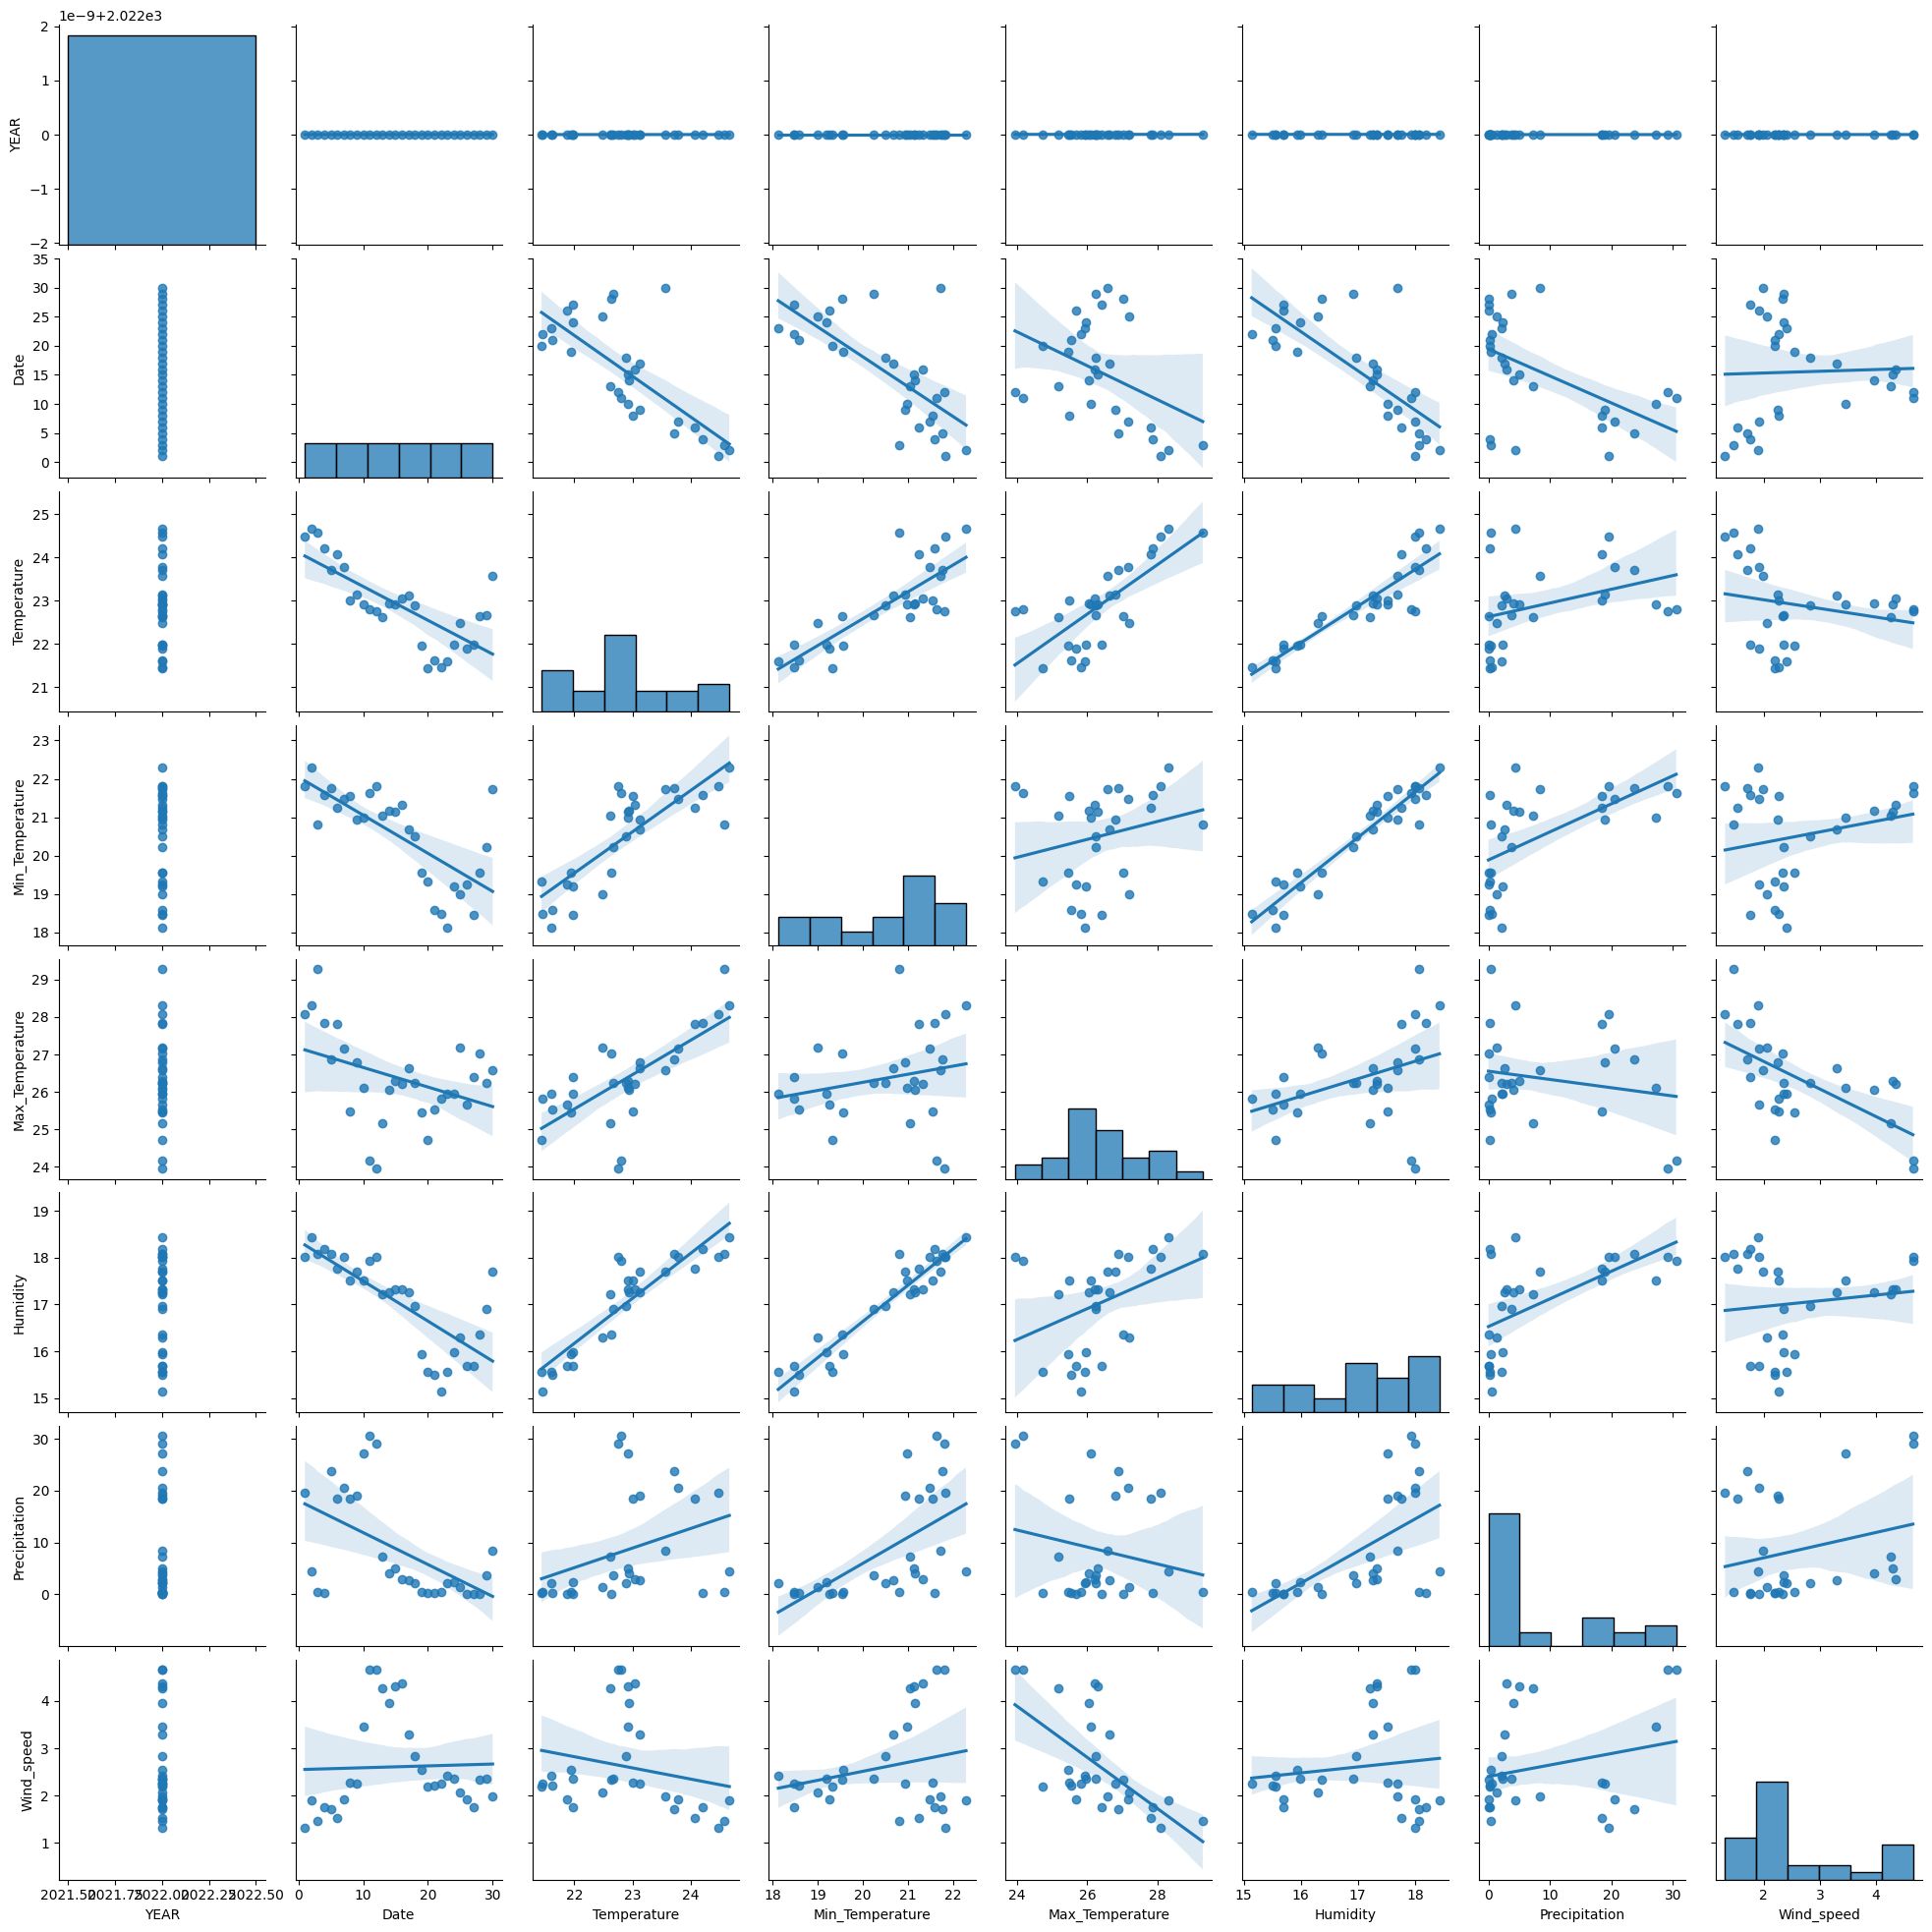

In [ ]:
# Pair plot for correlation
sns.pairplot(data, kind='reg')
plt.show()

In [ ]:
Temperature = data
normed_data = (Temperature  - Temperature.min()) / (Temperature.max() - Temperature.min())

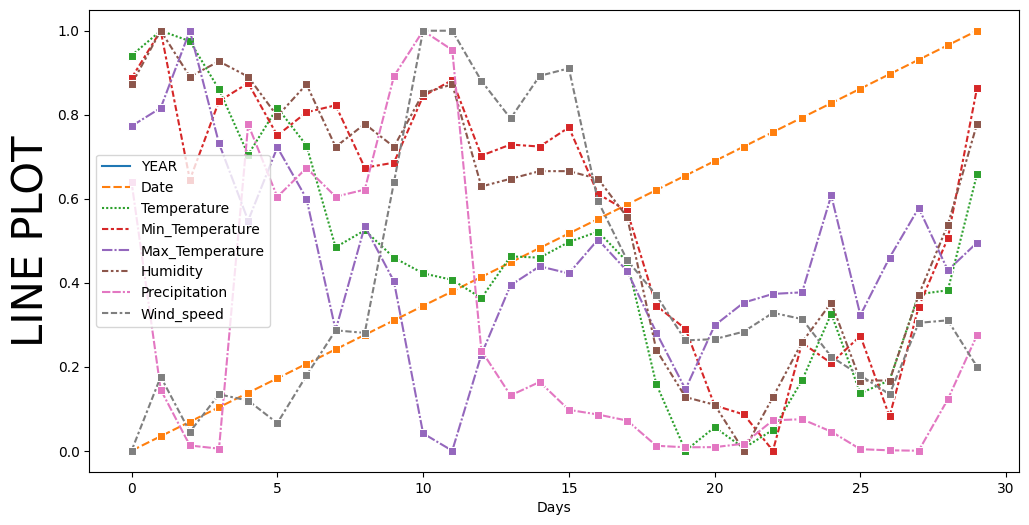

In [ ]:
#Line graph representation
plt.figure(figsize=(12,6))
plt.xlabel('Days')
plt.ylabel('LINE PLOT', fontsize=30)
sns.lineplot(data = normed_data, marker = 's')
plt.show()

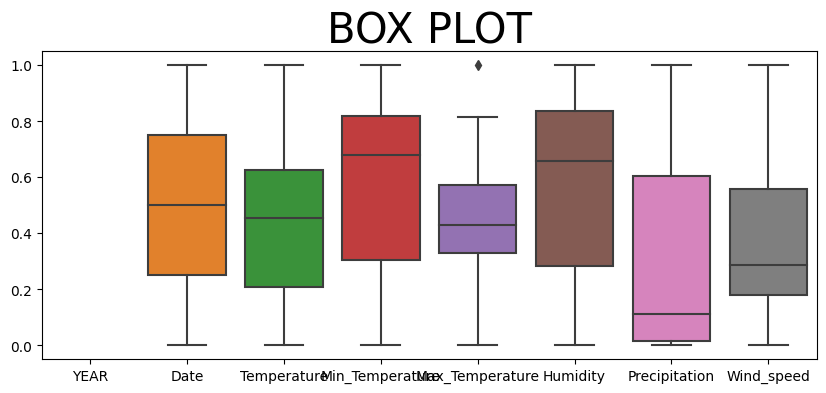

In [ ]:
#Box Plot
plt.figure(figsize = (10,4))
plt.title('BOX PLOT', fontsize=30)
sns.boxplot(data = normed_data)
plt.show()

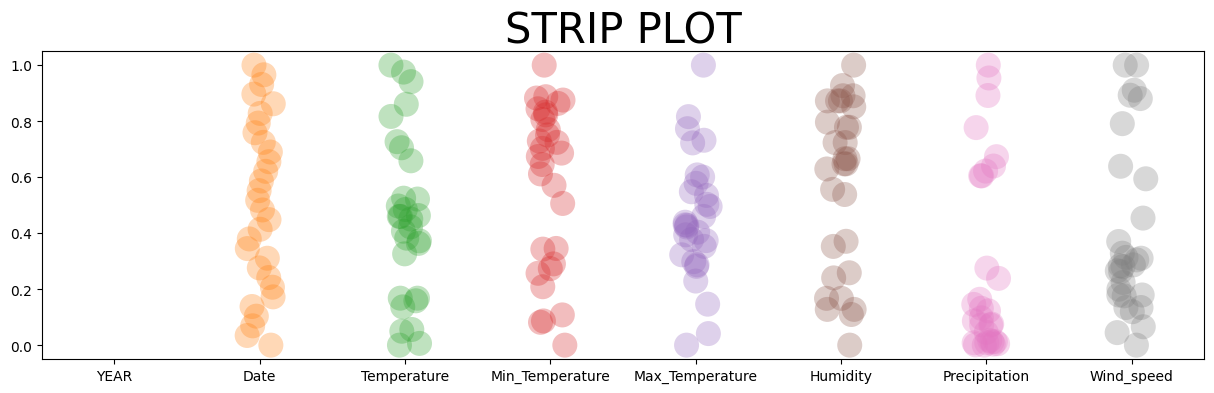

In [ ]:
#Strip Plot
plt.figure(figsize = (15,4))
plt.title('STRIP PLOT', fontsize=30)
sns.stripplot(data=normed_data, jitter= True, s =18, alpha = 0.3)
plt.show()